In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
np.random.seed(42)
data = {
    'Age': np.random.randint(18, 70, 350),
    'Height': np.random.randint(140, 200, 350),
    'Weight': np.random.randint(50, 100, 350),
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Introduce some missing values
df.loc[df.sample(frac=0.1).index, 'Age'] = np.nan
df.loc[df.sample(frac=0.05).index, 'Height'] = np.nan

# Introduce outliers
outliers = pd.DataFrame({
    'Age': [16, 75],
    'Height': [220, 130],
    'Weight': [40, 120],
})
df = df.append(outliers, ignore_index=True)

/var/folders/7n/47wy2ys56gz0qf38l7j6h6qr0000gn/T/ipykernel_53335/3123733351.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(outliers, ignore_index=True)


In [3]:
np.random.seed(42)
data = {
    'Age': np.random.randint(18, 70, 350),
    'Height': np.random.randint(140, 200, 350),
    'Weight': np.random.randint(50, 100, 350),
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Introduce some missing values
df.loc[df.sample(frac=0.1).index, 'Age'] = np.nan
df.loc[df.sample(frac=0.05).index, 'Height'] = np.nan

# Introduce outliers
outliers = pd.DataFrame({
    'Age': [16, 75],
    'Height': [220, 130],
    'Weight': [40, 120],
})

# Concatenate the original DataFrame with the outliers DataFrame
df = pd.concat([df, outliers], ignore_index=True)

In [4]:
df

,Age,Height,Weight
0,56.0,194.0,54
1,69.0,161.0,84
2,46.0,185.0,61
3,32.0,169.0,74
4,60.0,177.0,70
...,...,...,...
347,29.0,186.0,75
348,68.0,155.0,93
349,39.0,192.0,74
350,16.0,220.0,40


In [10]:
df.isnull().any()
df1=df.copy()

In [6]:
from sklearn.impute import SimpleImputer

In [8]:
median_imputer=SimpleImputer(missing_values=np.nan,strategy='median')

In [11]:
median_imputer=median_imputer.fit(df1)

In [12]:
imputed_df=median_imputer.transform(df1)

In [14]:
df1=pd.DataFrame(data=imputed_df,columns=df1.columns)

In [15]:
df1

,Age,Height,Weight
0,56.0,194.0,54.0
1,69.0,161.0,84.0
2,46.0,185.0,61.0
3,32.0,169.0,74.0
4,60.0,177.0,70.0
...,...,...,...
347,29.0,186.0,75.0
348,68.0,155.0,93.0
349,39.0,192.0,74.0
350,16.0,220.0,40.0


In [16]:
df1.isnull().any()

Age       False
Height    False
Weight    False
dtype: bool

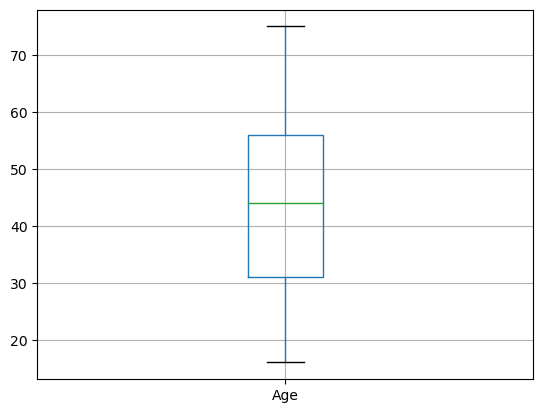

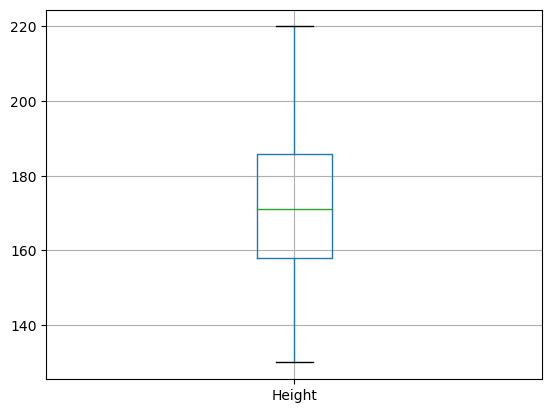

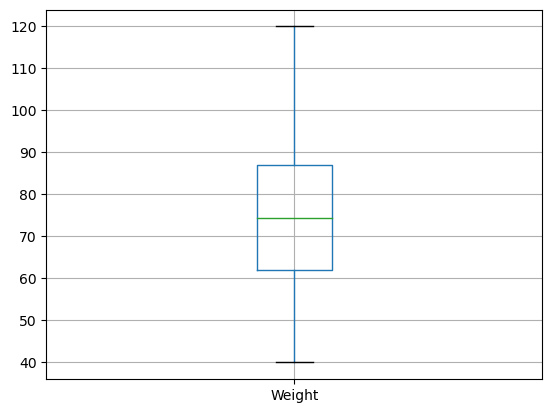

In [17]:
for column in df:
 plt.figure()
 df.boxplot([column])

In [18]:
df.corr()

,Age,Height,Weight
Age,1.000000,0.045563,-0.045598
Height,0.045563,1.000000,-0.076201
Weight,-0.045598,-0.076201,1.000000


In [22]:
for column in df:
    q1=df1[column].quantile(0.25)
    q3=df1[column].quantile(0.75)
    iqr=q3-q1
    ub=q3+1.5*iqr
    lb=q1-1.5*iqr
    print(ub,lb)
    

89.5 -2.5
225.5 117.5
124.5 24.5


<Axes: title={'center': 'sampleplot1'}>

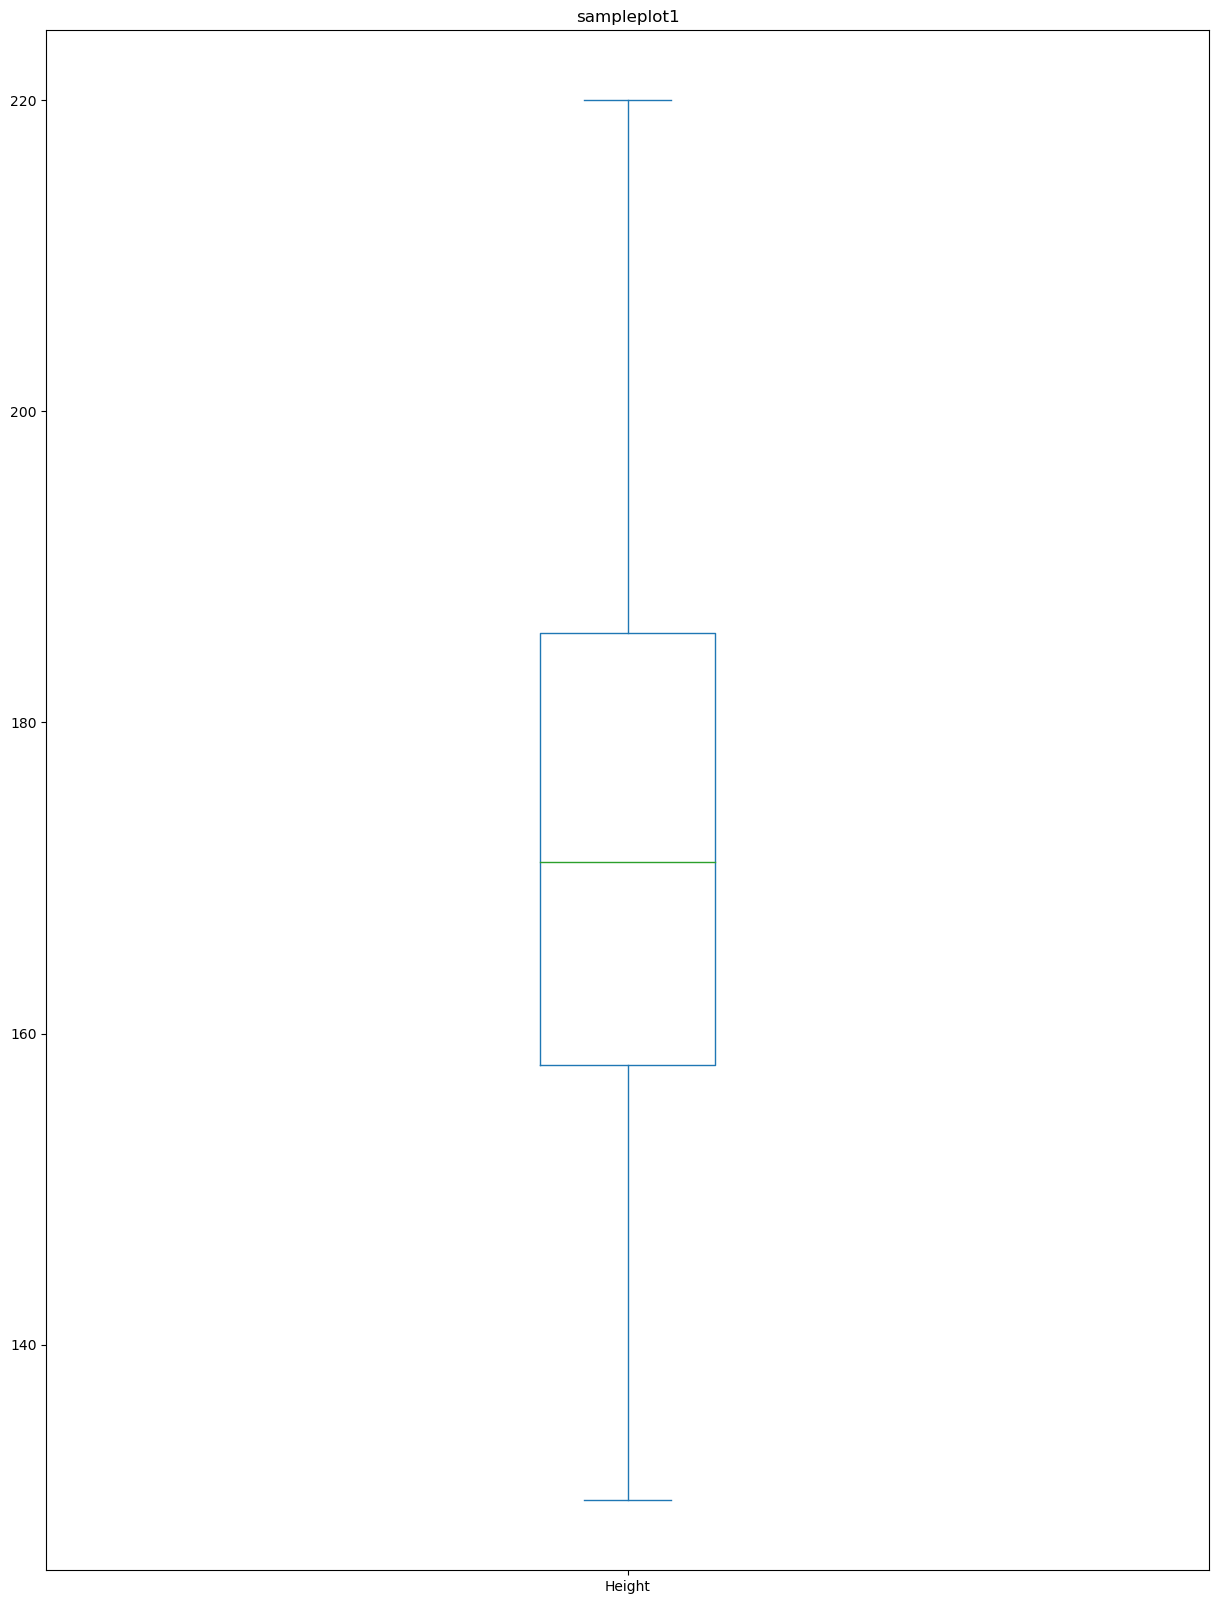

In [26]:
df.plot(x='Age',y='Height',kind='box',legend=True,title='sampleplot1',figsize=(15,20))